<a href="https://www.kaggle.com/code/abdelrahmanwael1029/mall-customer-segmentation?scriptVersionId=152820697" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv', index_col  = 'CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df.rename(columns={'Annual Income (k$)': 'A_Income',
                            'Spending Score (1-100)': 'Score'}, inplace=True)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
A_Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [5]:
df.isnull().sum()

Gender      0
Age         0
A_Income    0
Score       0
dtype: int64

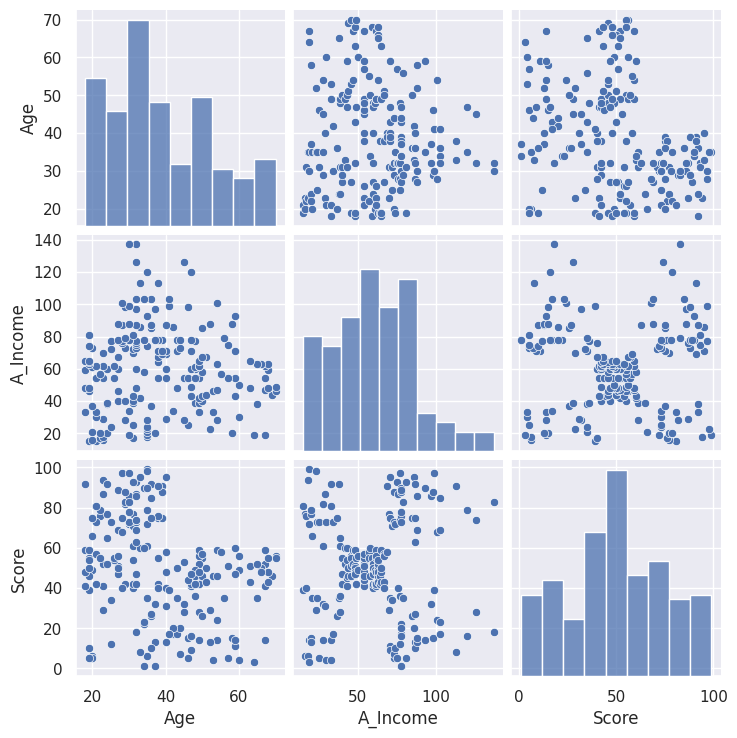

In [6]:
sns.set()
sns.pairplot(df)

<Axes: xlabel='Gender', ylabel='count'>

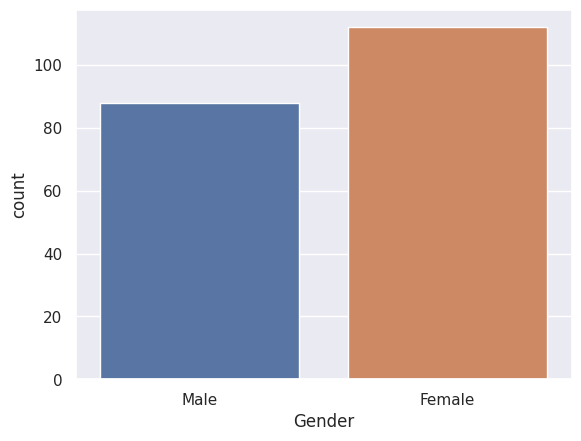

In [7]:
sns.countplot(df, x = 'Gender')

<Axes: xlabel='Age', ylabel='Density'>

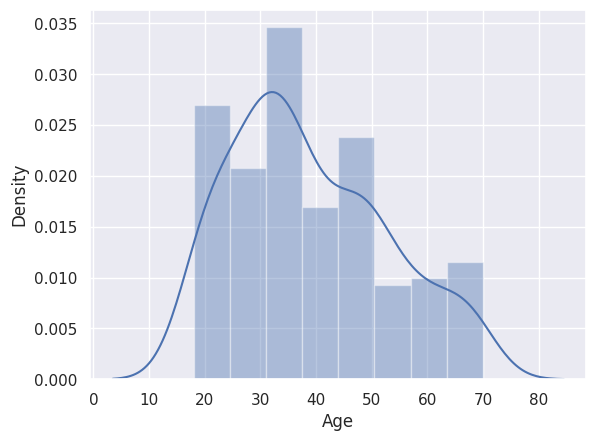

In [8]:
sns.distplot(df['Age'])

<Axes: xlabel='A_Income', ylabel='Score'>

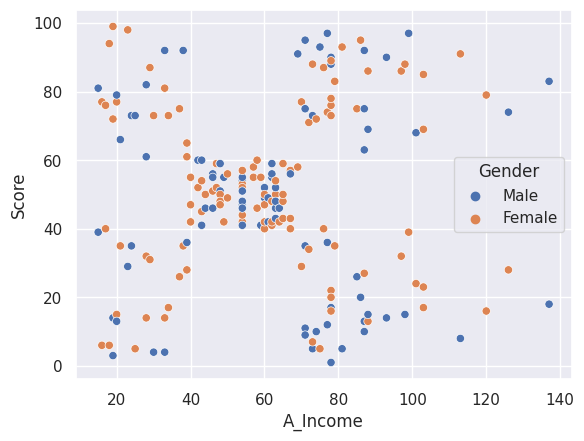

In [9]:
sns.scatterplot(df, x='A_Income', y = 'Score', hue = 'Gender')

In [10]:
X = df[['A_Income', 'Score']]
X

,A_Income,Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


# WCSS

In [11]:
from sklearn.cluster import KMeans, DBSCAN
wcss = []

for i in range(1, 12):
    model = KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)

<Axes: >

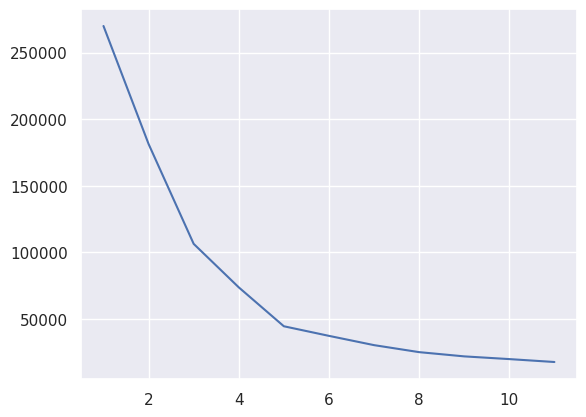

In [12]:
sns.set()
sns.lineplot(x=range(1,  12),y= wcss)

## n_cluster = 5

In [13]:
model = KMeans(n_clusters = 5)
model.fit(X)
y = model.labels_

<Axes: xlabel='A_Income', ylabel='Score'>

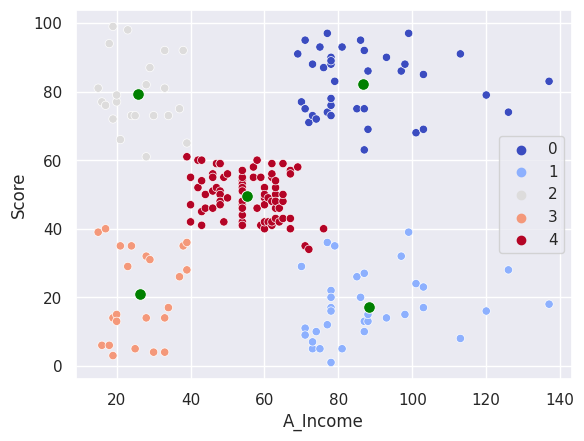

In [14]:
sns.scatterplot(x = X.iloc[:, 0], y = X.iloc[:, 1], hue = y, palette = 'coolwarm')
sns.scatterplot(x = model.cluster_centers_[:, 0], y = model.cluster_centers_[:, 1], c = 'green', s = 70)

In [15]:
from sklearn.metrics import silhouette_score
silhouette_score(X, y)

0.553931997444648

In [16]:
dbscan = DBSCAN(eps = 9, min_samples = 5)
dbscan.fit(X)
DBy = dbscan.labels_

<Axes: xlabel='A_Income', ylabel='Score'>

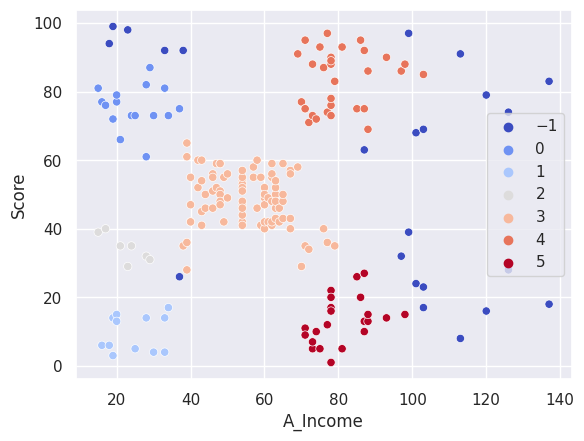

In [17]:
sns.scatterplot(x = X.iloc[:, 0], y = X.iloc[:, 1], hue = DBy, palette = 'coolwarm')


In [18]:
silhouette_score(X, DBy)

0.43598431858196485